### Coors Hangover Project

In this notebook, I will attempt to answer a question that I've always been curious about as a Rockies fan. Most who follow the MLB about the "Coors Effect", which is the effect the high elevation of Coors Field in Denver on ballflight. The thin air at elevation causes spin on pitches to have less of an effect and for batted balls to fly further - making Coors Field a hitter's paradise. The Rockies, playing half of their games in Denver, take advantage of this effect and usually put up good offensive performances at home. However, their performance suffers on the road without the help of the high elevation. As a fan, I've noticed this reverse effect seems to occur most often in the first game of a new road trip. They seem to always lose a 2-1 game in San Francisco on a Friday night after bashing the ball around the park on their previous homestand. Here, I'm putting my observation to the test. Is there a statistically significant difference between the Rockies team OPS+ in the first game of a road trip than all other games? Is there a difference between the first road game and any road games?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing data and filtering to Rockies games. The data is from Retrosheet, and all Rockies games from their founding in 1993 through 2021 are included

In [2]:
gamelog1993 = pd.read_csv("RetrosheetGameData/GL1993.txt")
gamelog1994 = pd.read_csv("RetrosheetGameData/GL1994.txt")
gamelog1995 = pd.read_csv("RetrosheetGameData/GL1995.txt")
gamelog1996 = pd.read_csv("RetrosheetGameData/GL1996.txt")
gamelog1997 = pd.read_csv("RetrosheetGameData/GL1997.txt")
gamelog1998 = pd.read_csv("RetrosheetGameData/GL1998.txt")
gamelog1999 = pd.read_csv("RetrosheetGameData/GL1999.txt")
gamelog2000 = pd.read_csv("RetrosheetGameData/GL2000.txt")
gamelog2001 = pd.read_csv("RetrosheetGameData/GL2001.txt")
gamelog2002 = pd.read_csv("RetrosheetGameData/GL2002.txt")
gamelog2003 = pd.read_csv("RetrosheetGameData/GL2003.txt")
gamelog2004 = pd.read_csv("RetrosheetGameData/GL2004.txt")
gamelog2005 = pd.read_csv("RetrosheetGameData/GL2005.txt")
gamelog2006 = pd.read_csv("RetrosheetGameData/GL2006.txt")
gamelog2007 = pd.read_csv("RetrosheetGameData/GL2007.txt")
gamelog2008 = pd.read_csv("RetrosheetGameData/GL2008.txt")
gamelog2009 = pd.read_csv("RetrosheetGameData/GL2009.txt")
gamelog2010 = pd.read_csv("RetrosheetGameData/GL2010.txt")
gamelog2011 = pd.read_csv("RetrosheetGameData/GL2011.txt")
gamelog2012 = pd.read_csv("RetrosheetGameData/GL2012.txt")
gamelog2013 = pd.read_csv("RetrosheetGameData/GL2013.txt")
gamelog2014 = pd.read_csv("RetrosheetGameData/GL2014.txt")
gamelog2015 = pd.read_csv("RetrosheetGameData/GL2015.txt")
gamelog2016 = pd.read_csv("RetrosheetGameData/GL2016.txt")
gamelog2017 = pd.read_csv("RetrosheetGameData/GL2017.txt")
gamelog2018 = pd.read_csv("RetrosheetGameData/GL2018.txt")
gamelog2019 = pd.read_csv("RetrosheetGameData/GL2019.txt")
gamelog2020 = pd.read_csv("RetrosheetGameData/GL2020.txt")
gamelog2021 = pd.read_csv("RetrosheetGameData/GL2021.txt")
loglst = [gamelog1993, gamelog1994, gamelog1995, gamelog1996, gamelog1997, gamelog1998, gamelog1999, gamelog2000, gamelog2001, 
          gamelog2002, gamelog2003, gamelog2004, gamelog2005, gamelog2006, gamelog2007, gamelog2008, gamelog2009, gamelog2010, 
          gamelog2011, gamelog2012, gamelog2013, gamelog2014, gamelog2015, gamelog2016, gamelog2017, gamelog2018, gamelog2019, 
          gamelog2020, gamelog2021]
fullgamelog = pd.concat(loglst)
dateconv = lambda date: str(date)
fullgamelog.Date = fullgamelog.Date.apply(dateconv)
fullgamelog

,Date,GameOfDay,Day,VTeam,VLeague,VGame#,HTeam,HLeague,HGame#,VScore,...,H7Name,H7Position,H8ID,H8Name,H8Position,H9ID,H9Name,H9Position,AddInfo,AcqInfo
0,19930405,0,Mon,TEX,AL,1,BAL,AL,1,7,...,Leo Gomez,5,mercl001,Luis Mercedes,9,reynh001,Harold Reynolds,4,NaN,Y
1,19930405,0,Mon,NYA,AL,1,CLE,AL,1,9,...,Carlos Martinez,5,hillg001,Glenallen Hill,9,aloms001,Sandy Alomar,2,NaN,Y
2,19930405,0,Mon,BOS,AL,1,KCA,AL,1,3,...,Brian McRae,8,lindj002,Jose Lind,4,gagng001,Greg Gagne,6,NaN,Y
3,19930405,0,Mon,DET,AL,1,OAK,AL,1,4,...,Jerry Browne,5,bordm001,Mike Bordick,6,blanl001,Lance Blankenship,4,NaN,Y
4,19930405,0,Mon,ATL,NL,1,CHN,NL,1,1,...,Rick Wilkins,2,vizcj001,Jose Vizcaino,4,morgm001,Mike Morgan,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,20211003,0,Sun,MIN,AL,162,KCA,AL,162,7,...,Michael Taylor,8,albeh001,Hanser Alberto,4,gallc001,Cam Gallagher,2,NaN,Y
2425,20211003,0,Sun,TBA,AL,162,NYA,AL,162,0,...,Brett Gardner,8,sancg002,Gary Sanchez,2,odorr001,Rougned Odor,5,NaN,Y
2426,20211003,0,Sun,ANA,AL,162,SEA,AL,162,7,...,Jarred Kelenic,8,ralec001,Cal Raleigh,2,moord002,Dylan Moore,7,NaN,Y
2427,20211003,0,Sun,CLE,AL,162,TEX,AL,162,6,...,Nick Solak,10,trevj001,Jose Trevino,2,herny003,Yonny Hernandez,5,NaN,Y


In [3]:
rockiesgames = fullgamelog[(fullgamelog.VTeam == "COL") | (fullgamelog.HTeam == "COL")]
index = list(range(0, 4534))
rockiesgames.insert(0, "index", index, True)
rockiesgames = rockiesgames.set_index("index")
rockiesgames

,Date,GameOfDay,Day,VTeam,VLeague,VGame#,HTeam,HLeague,HGame#,VScore,...,H7Name,H7Position,H8ID,H8Name,H8Position,H9ID,H9Name,H9Position,AddInfo,AcqInfo
index,,,,,,,,,,,,,,,,,,,,,
0,19930405,0,Mon,COL,NL,1,NYN,NL,1,0,...,Jeff Kent,4,hundt001,Todd Hundley,2,goodd001,Dwight Gooden,1,NaN,Y
1,19930407,0,Wed,COL,NL,2,NYN,NL,2,1,...,Dave Gallagher,8,hundt001,Todd Hundley,2,sabeb001,Bret Saberhagen,1,NaN,Y
2,19930409,0,Fri,MON,NL,4,COL,NL,3,4,...,Joe Girardi,2,benaf001,Freddie Benavides,6,smitb001,Bryn Smith,1,NaN,Y
3,19930410,0,Sat,MON,NL,5,COL,NL,4,5,...,Joe Girardi,2,benaf001,Freddie Benavides,6,niedd001,David Nied,1,NaN,Y
4,19930411,0,Sun,MON,NL,6,COL,NL,5,19,...,Joe Girardi,2,benaf001,Freddie Benavides,6,henrb001,Butch Henry,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,20210928,0,Tue,WAS,NL,158,COL,NL,157,1,...,Yonathan Daza,9,hills005,Sam Hilliard,7,freek001,Kyle Freeland,1,NaN,Y
4530,20210929,0,Wed,WAS,NL,159,COL,NL,158,5,...,Sam Hilliard,8,nuned001,Dom Nunez,2,lambp001,Peter Lambert,1,NaN,Y
4531,20211001,0,Fri,COL,NL,159,ARI,NL,160,9,...,Jake McCarthy,8,perdg001,Gerardo Perdomo,6,casth002,Humberto Castellanos,1,NaN,Y


Test Statistic: OPS+

OPS+ = 100 * ((OBP/lgOBP) + (SLG/lgSLG) - 1), where lgOBP and lgSLG are the on base and slugging percentages for the league and OBP and SLG are weighted by park factors.

OPS+ is the best test statistic for this project because it is a strong indicator of offensive performance, can be used for an individual or a team (using it for a team in this case), and it neutralizes effects of different parks. Therefore, when comparing OPS+ observations, secondary factors such as park factors have already been handled, and the values can be compared

In [8]:
#calculating league average OBP and SLG
leagueavgtable = pd.read_csv("LeagueAvgStats1993-2021.txt").set_index("Year")
leagueavgtable
lgTB = 0
lgtimesonbase = 0
lgPA = 0
lgAB = 0
for i in range(1993, 2022):
    year = leagueavgtable.loc[i]
    lgTB += (year.get("TB")*year.get("G"))
    lgPA += (year.get("PA")*year.get("G"))
    lgAB += (year.get("AB")*year.get("G"))
    lgtimesonbase += (year.get("H")*year.get("G")) + (year.get("BB")*year.get("G")) + (year.get("IBB")*year.get("G")) + (year.get("HBP")*year.get("G"))
lgavgobp = lgtimesonbase / lgPA
lgavgslg = lgTB / lgAB

In [5]:
pf1993 = pd.read_csv("MLBParkFactors/ParkFactors1993.csv").set_index("Team")
pf1994 = pd.read_csv("MLBParkFactors/ParkFactors1994.csv").set_index("Team")
pf1995 = pd.read_csv("MLBParkFactors/ParkFactors1995.csv").set_index("Team")
pf1996 = pd.read_csv("MLBParkFactors/ParkFactors1996.csv").set_index("Team")
pf1997 = pd.read_csv("MLBParkFactors/ParkFactors1997.csv").set_index("Team")
pf1998 = pd.read_csv("MLBParkFactors/ParkFactors1998.csv").set_index("Team")
pf1999 = pd.read_csv("MLBParkFactors/ParkFactors1999.csv").set_index("Team")
pf2000 = pd.read_csv("MLBParkFactors/ParkFactors2000.csv").set_index("Team")
pf2001 = pd.read_csv("MLBParkFactors/ParkFactors2001.csv").set_index("Team")
pf2002 = pd.read_csv("MLBParkFactors/ParkFactors2002.csv").set_index("Team")
pf2003 = pd.read_csv("MLBParkFactors/ParkFactors2003.csv").set_index("Team")
pf2004 = pd.read_csv("MLBParkFactors/ParkFactors2004.csv").set_index("Team")
pf2005 = pd.read_csv("MLBParkFactors/ParkFactors2005.csv").set_index("Team")
pf2006 = pd.read_csv("MLBParkFactors/ParkFactors2006.csv").set_index("Team")
pf2007 = pd.read_csv("MLBParkFactors/ParkFactors2007.csv").set_index("Team")
pf2008 = pd.read_csv("MLBParkFactors/ParkFactors2008.csv").set_index("Team")
pf2009 = pd.read_csv("MLBParkFactors/ParkFactors2009.csv").set_index("Team")
pf2010 = pd.read_csv("MLBParkFactors/ParkFactors2010.csv").set_index("Team")
pf2011 = pd.read_csv("MLBParkFactors/ParkFactors2011.csv").set_index("Team")
pf2012 = pd.read_csv("MLBParkFactors/ParkFactors2012.csv").set_index("Team")
pf2013 = pd.read_csv("MLBParkFactors/ParkFactors2013.csv").set_index("Team")
pf2014 = pd.read_csv("MLBParkFactors/ParkFactors2014.csv").set_index("Team")
pf2015 = pd.read_csv("MLBParkFactors/ParkFactors2015.csv").set_index("Team")
pf2016 = pd.read_csv("MLBParkFactors/ParkFactors2016.csv").set_index("Team")
pf2017 = pd.read_csv("MLBParkFactors/ParkFactors2017.csv").set_index("Team")
pf2018 = pd.read_csv("MLBParkFactors/ParkFactors2018.csv").set_index("Team")
pf2019 = pd.read_csv("MLBParkFactors/ParkFactors2019.csv").set_index("Team")
pf2020 = pd.read_csv("MLBParkFactors/ParkFactors2020.csv").set_index("Team")
pf2021 = pd.read_csv("MLBParkFactors/ParkFactors2021.csv").set_index("Team")
pfdict = {"1993": pf1993, "1994": pf1994, "1995": pf1995, "1996": pf1996, "1997": pf1997, "1998": pf1998, "1999": pf1999,
         "2000": pf2000, "2001": pf2001, "2002": pf2002, "2003": pf2003, "2004": pf2004, "2005": pf2005, "2006": pf2006,
         "2007": pf2007, "2008": pf2008, "2009": pf2009, "2010": pf2010, "2011": pf2011, "2012": pf2012, "2013": pf2013,
         "2014": pf2014, "2015": pf2015, "2016": pf2016, "2017": pf2017, "2018": pf2018, "2019": pf2019, "2020": pf2020,
         "2021": pf2021}
teamdict = {"COL": "Rockies", "SDN": "Padres", "LAN": "Dodgers", "SFN": "Giants", "ARI": "Diamondbacks", "LAA": "Angels", 
           "ANA": "Angels", "HOU": "Astros", "TEX": "Rangers", "SEA": "Mariners", "OAK": "Athletics", "MIN": "Twins",
           "CLE": "Indians", "DET": "Tigers", "CHA": "White Sox", "KCA": "Royals", "SLN": "Cardinals", "MIL": "Brewers",
           "CIN": "Reds", "CHN": "Cubs", "PIT": "Pirates", "BAL": "Orioles", "TBA": "Rays", "TOR": "Blue Jays", "NYA": "Yankees",
           "BOS": "Red Sox", "NYN": "Mets", "ATL": "Braves", "FLO": "Marlins", "MIA": "Marlins", "PHI": "Phillies",
           "MON": "Expos", "WAS": "Nationals"}

In [9]:
#finding the first games of new roadtrips
awayteamlst = list(rockiesgames.VTeam)
datelst = list(rockiesgames.Date)
firstgameafterhomestandlst = []
for i in range(1, 4534):
    if (awayteamlst[i] == "COL") & (awayteamlst[i-1] != "COL") & (datelst[i][:4] == datelst[i-1][:4]):
        firstgameafterhomestandlst.append(i)
firstafteranydf = rockiesgames.loc[firstgameafterhomestandlst,:]
firstafteranydf

,Date,GameOfDay,Day,VTeam,VLeague,VGame#,HTeam,HLeague,HGame#,VScore,...,H7Name,H7Position,H8ID,H8Name,H8Position,H9ID,H9Name,H9Position,AddInfo,AcqInfo
index,,,,,,,,,,,,,,,,,,,,,
8,19930416,0,Fri,COL,NL,9,MON,NL,10,2,...,Lou Frazier,7,speht001,Tim Spehr,2,bottk001,Kent Bottenfield,1,NaN,Y
21,19930430,0,Fri,COL,NL,22,FLO,NL,23,6,...,Alex Arias,4,weisw001,Walt Weiss,6,bower001,Ryan Bowen,1,NaN,Y
34,19930514,0,Fri,COL,NL,35,CIN,NL,35,5,...,Reggie Sanders,9,olivj001,Joe Oliver,2,pught001,Tim Pugh,1,NaN,Y
53,19930604,0,Fri,COL,NL,54,PHI,NL,52,2,...,Milt Thompson,7,batik002,Kim Batiste,6,mulht001,Terry Mulholland,1,NaN,Y
70,19930624,0,Thu,COL,NL,71,SFN,NL,73,2,...,Kirt Manwaring,2,benjm001,Mike Benjamin,5,burkj001,John Burkett,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4469,20210723,0,Fri,COL,NL,97,LAN,NL,99,9,...,Matt Beaty,3,mckiz001,Zach McKinstry,4,pricd001,David Price,1,NaN,Y
4485,20210810,0,Tue,COL,NL,113,HOU,AL,113,0,...,Chas McCormick,8,jonet005,Taylor Jones,3,maldm001,Martin Maldonado,2,NaN,Y
4497,20210823,0,Mon,COL,NL,125,CHN,NL,127,4,...,Robinson Chirinos,2,romia001,Andrew Romine,6,hendk001,Kyle Hendricks,1,NaN,Y


In [11]:
#function to calculate OPS+
def totalOPSplus(df, idxlst):
    totalbases = 0
    hits = 0
    atbats = 0
    walks = 0
    sac = 0
    k = 0
    for i in idxlst:
        gamedata = df.loc[i]
        if gamedata.get('VTeam') == 'COL':
            ab = gamedata.get('VAB')
            doubles = gamedata.get('V2B')
            triples = gamedata.get('V3B')
            homers = gamedata.get('VHR')
            gamewalks = gamedata.get('VBB')
            gamek = gamedata.get('VK')
            hbp = gamedata.get('VHBP')
            gameibb = gamedata.get('VIBB')
            singles = gamedata.get('VH') - doubles - triples - homers
            sac += gamedata.get('VSacHits') + gamedata.get('VSacFlies')
            hometeam = gamedata.get('HTeam')
        else:
            ab = gamedata.get('HAB')
            doubles = gamedata.get('H2B')
            triples = gamedata.get('H3B')
            homers = gamedata.get('HHR')
            gamewalks = gamedata.get('HBB')
            gamek = gamedata.get('HK')
            hbp = gamedata.get('HHBP')
            gameibb = gamedata.get('HIBB')
            singles = gamedata.get('HH') - doubles - triples - homers
            sac += gamedata.get('HSacHits') + gamedata.get('HSacFlies')
            hometeam = "COL" 
        year = gamedata.Date[:4]
        parkfactordf = pfdict[year]
        ballpark = teamdict[hometeam]
        if (hometeam == "TBA") & (int(year) < 2008):
            ballpark = "Devil Rays"
        parkfactordata = parkfactordf.loc[ballpark]
        doubleval = (doubles / (parkfactordata.get("2B") / 100)) * 2
        tripleval = (triples / (parkfactordata.get("3B") / 100)) * 3
        homerval = (homers / (parkfactordata.get("HR") / 100)) * 4
        singleval = singles / (parkfactordata.get("1B") / 100)
        gamekval = gamek / (parkfactordata.get("SO") / 100)
        gamewalksval = gamewalks / (parkfactordata.get("BB") / 100)
        atbats += ab - gamek
        k += gamekval
        walks += gamewalksval + gameibb + hbp
        totalbases += singleval + doubleval + tripleval + homerval
        hits += singles + doubles + triples + homers
    opsplus = 100*((((hits + walks)/(atbats + k + walks + sac))/lgavgobp) + ((totalbases/(atbats + k))/lgavgslg) - 1)
    return opsplus

#finding OPS+ for the first game of Rockies road trips
firstafterhome = totalOPSplus(firstafteranydf, firstgameafterhomestandlst)
firstafterhome

85.1523051093268

To test the significance of the OPS+ value in Rockies first road games (85.15), I am going to use bootstrapping. I am going to take 5000 resamples, each of 331 Rockies games (same amount as the number of first games of a roadtrip), and find the p-value of an OPS+ of 85.15. The p-value will be tested at the 0.05 significance level

In [13]:
firstroadvsallsample = []
for i in range(5000):
    sample = rockiesgames.sample(n=firstafteranydf.shape[0], replace = False)
    sampleopsplus = totalOPSplus(sample, sample.index)
    firstroadvsallsample.append(sampleopsplus)

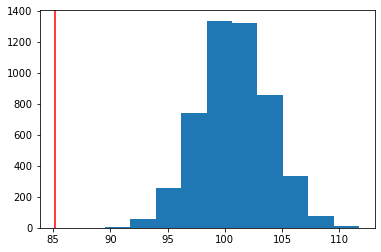

In [14]:
plt.hist(firstroadvsallsample, label = "Distribution of OPS+ in 5000 samples of any 331 Rockies games")
plt.axvline(firstafterhome, color = "red", label = "Rockies OPS+ in first road game after homestand")

In [15]:
#find p-value
firstafterhomepval = np.count_nonzero(firstroadvsallsample <= firstafterhome)/len(firstroadvsallsample)
firstafterhomepval

0.0

P-value of 0 means I can reject the null hypothesis that there is no significant difference in offensive performance between
the first games of the Rockies' road trips and the rest of their games. Next, I am going to repeat the test, this time resampling only from road games, to see if there is anything significant about the first game of the road trip, or if the Rockies offense generally performs worse on the road as a whole

In [12]:
rockiesroadgames = rockiesgames[rockiesgames.VTeam == "COL"]
firstroadvsrdgmssample = []
for i in range(5000):
    sample = rockiesroadgames.sample(n=firstafteranydf.shape[0], replace = False)
    sampleopsplus = totalOPSplus(sample, sample.index)
    firstroadvsrdgmssample.append(sampleopsplus)

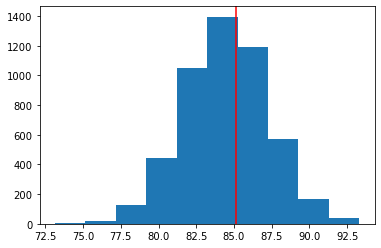

In [14]:
plt.hist(firstroadvsrdgmssample, label = "Distribution of OPS+ in 5000 samples of any 331 Rockies road games")
plt.axvline(firstafterhome, color = "red", label = "Rockies OPS+ in first road game after homestand")

In [131]:
firstafterhomerdgmspval = np.count_nonzero(firstroadvsrdgmssample <= firstafterhome)/len(firstroadvsrdgmssample)
firstafterhomerdgmspval

0.5876

In [132]:
print(sum(firstroadvsallsample) / len(firstroadvsallsample))
print(sum(firstroadvsrdgmssample) / len(firstroadvsrdgmssample))

100.64554622700005
84.50890160440025


In [137]:
rockieshomegames = rockiesgames[rockiesgames.HTeam == "COL"]
rockieshomegamesopsplus = totalOPSplus(rockieshomegames, rockieshomegames.index)
rockiesroadgamesopsplus = totalOPSplus(rockiesroadgames, rockiesroadgames.index)
print("Road OPS+: " + str(int(round(rockiesroadgamesopsplus, 0))))
print("Home OPS+: " + str(int(round(rockieshomegamesopsplus, 0))))

Road OPS+: 84
Home OPS+: 117


The second test shows evidence that there is no worse offensive performance based on OPS + between the first game of a road trip and the rest of the road games (fail to reject the null hypothesis). Comparing Road OPS+ to Home OPS+ shows a drastic difference in offensive performance between home and road. This provides some evidence to the existence of a "reverse Coors Effect", where Rockies hitters are bound to succeed at home but doomed to fail on the road, but further testing would be needed to prove this. Similarly, my experiment can be done better. I calculated OPS+ the best I could based on what I read on Baseball Reference and MLB.com, but there could be errors. Any guidance or feedback on the OPS+ calculation or this project as a whole would be greatly appreciated.